# Example 2 - Folded Layer

This example will show how to convert the geological map below to a `GemPy` model. This example is based on digitized data. 
<img src='../../../gemgis/data/examples/example2/task2.png' width="300">

# Importing Libraries

In [1]:
import sys
sys.path.append('../../../gemgis')
import gemgis as gg
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load Data

In [2]:
base_map = rasterio.open('../../../gemgis/data/examples/example2/task2.png')
interfaces = gpd.read_file('../../../gemgis/data/examples/example2/interfaces2_lines.shp')
orientations = gpd.read_file('../../../gemgis/data/examples/example2/orientations2.shp')
extent = gpd.read_file('../../../gemgis/data/examples/example2/extent2.shp')
topo = gpd.read_file('../../../gemgis/data/examples/example2/topo2.shp')
custom_section = gpd.read_file('../../../gemgis/data/examples/example2/customsections2.shp')

C:\Users\user_abuser\Anaconda3\lib\site-packages\rasterio\__init__.py:216: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, **kwargs)


# Inspect Data

In [3]:
interfaces.head()

id formation    Z                                           geometry
0  None    Layer1    0  LINESTRING (750.000 865.441, 764.514 845.629, ...
1  None    Layer1   50  LINESTRING (628.941 863.195, 637.925 850.294, ...
2  None    Layer1  100  LINESTRING (534.604 865.153, 549.463 845.687, ...
3  None    Layer1  150  LINESTRING (458.590 864.955, 473.370 845.597, ...
4  None    Layer1  100  LINESTRING (2.577 102.527, 17.435 83.097, 25.0...

In [4]:
orientations.head()

id    Z  dip  azimuth formation                 geometry
0  None  350   30      225    Layer1  POINT (319.826 436.957)
1  None  300   30      225    Layer1  POINT (276.736 359.570)
2  None  250   30      225    Layer1  POINT (237.163 271.630)
3  None  200   26      225    Layer1  POINT (189.675 194.243)
4  None  150   26      225    Layer1  POINT (117.565 124.770)

In [5]:
extent.head()

id                                           geometry
0  None  POLYGON ((0.000 866.000, 865.000 866.000, 865....

In [6]:
topo.head()

id    Z                                           geometry
0  None  350  LINESTRING (1.385 62.877, 136.138 47.987, 292....
1  None  300  LINESTRING (1.571 124.111, 129.996 110.524, 22...
2  None  250  LINESTRING (0.082 198.374, 59.641 178.273, 118...
3  None   50  LINESTRING (863.690 271.706, 829.815 271.334, ...
4  None  100  LINESTRING (864.062 307.070, 828.326 304.092, ...

In [7]:
custom_section.head()

id   section                                     geometry
0  None  Section1  LINESTRING (1.593 388.445, 852.428 865.929)

# Create GemPy Data Class

In [8]:
geo_data = gg.GemPyData(model_name='Model2', 
                        crs='EPSG:4326')

In [9]:
vars(geo_data)

{'model_name': 'Model2',
 'crs': 'EPSG:4326',
 'extent': None,
 'resolution': None,
 'interfaces': None,
 'orientations': None,
 'section_dict': None,
 'stack': None,
 'dem': None,
 'surface_colors': None,
 'geolmap': None,
 'faults': None,
 'is_fault': None}

# Set Extent

In [10]:
geo_data.set_extent(gdf=extent, minz=-50, maxz=400)
geo_data.extent

[0.0, 865.0, 0.0, 866.0, -50, 400]

# Set Resolution

In [11]:
geo_data.set_resolution(50,50,50)
geo_data.resolution

[50, 50, 50]

# Plot Data

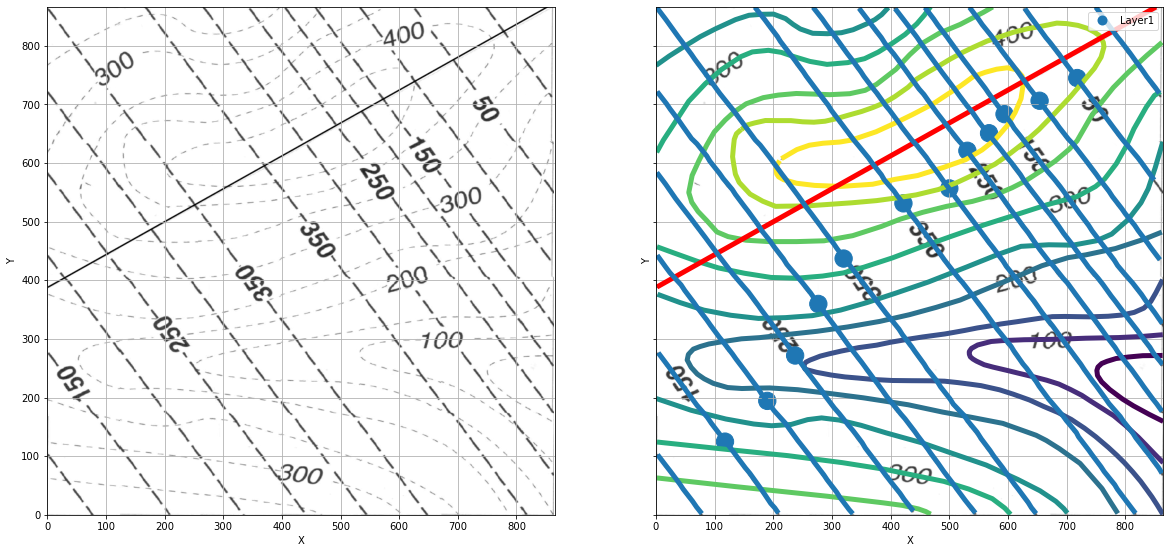

In [12]:
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
# Plotting the geological map
ax1.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()
ax1.set_ylim(geo_data.extent[2],geo_data.extent[3])
ax1.set_xlim(geo_data.extent[0],geo_data.extent[1])

# Plotting the geological map
ax2.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
# Plotting the different elements on the geological map
topo.plot(ax=ax2, column = 'Z', legend = False, linewidth = 5)
custom_section.plot(ax=ax2, legend = False, linewidth = 5,color='red')
interfaces.plot(ax=ax2, column = 'formation', legend = True, linewidth = 5)
orientations.plot(ax=ax2, column = 'formation', legend = False, s = 300)

ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid()
ax1.set_ylim(geo_data.extent[2],geo_data.extent[3])
ax1.set_xlim(geo_data.extent[0],geo_data.extent[1]);

# Interpolate Topography

In [13]:
dem = gg.vector.interpolate_raster(topo, method='rbf')
dem

array([[376.20250341, 376.17026864, 376.13726861, ..., 151.2072866 ,
        150.62305109, 150.12421308],
       [375.82182976, 375.78933294, 375.75603738, ..., 150.71949949,
        150.13832737, 149.64002732],
       [375.44007438, 375.40730712, 375.3737062 , ..., 150.30268463,
        149.73838827, 149.24734253],
       ...,
       [240.46392464, 240.37584045, 240.28945558, ..., 359.90575305,
        359.60167206, 359.29757301],
       [240.45275522, 240.36385251, 240.27663029, ..., 359.98508309,
        359.6833359 , 359.38156858],
       [240.44305532, 240.3533452 , 240.26529712, ..., 360.06230619,
        359.76289529, 359.46346152]])

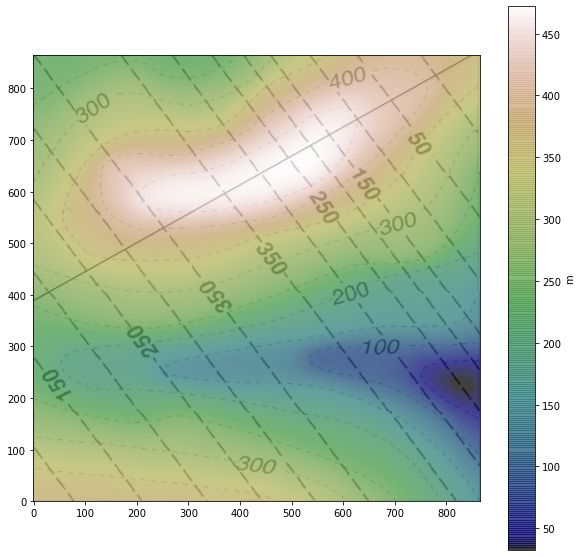

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
im = plt.imshow(dem,origin = 'lower', alpha=0.75, cmap='gist_earth')
cbar = plt.colorbar(im)
cbar.set_label('m')

# Save Topography as Raster

In [15]:
gg.raster.save_as_tiff('../../../gemgis/data/examples/example2/topo.tif',dem, crs='EPSG:4326', extent=[0,870,0,870])#geo_data.extent)

In [16]:
topography = rasterio.open('../../../gemgis/data/examples/example2/topo.tif')
topography

<open DatasetReader name='../../../gemgis/data/examples/example2/topo.tif' mode='r'>

# Set Interfaces

In [17]:
interfaces_coords = gg.vector.extract_xy(interfaces)
interfaces_coords.head()

id formation  Z                                           geometry  \
0  None    Layer1  0  LINESTRING (750.000 865.441, 764.514 845.629, ...   
0  None    Layer1  0  LINESTRING (750.000 865.441, 764.514 845.629, ...   
0  None    Layer1  0  LINESTRING (750.000 865.441, 764.514 845.629, ...   
0  None    Layer1  0  LINESTRING (750.000 865.441, 764.514 845.629, ...   
0  None    Layer1  0  LINESTRING (750.000 865.441, 764.514 845.629, ...   

                                   points           X           Y  
0  (750.0003891306708, 865.4411014639877)  750.000389  865.441101  
0   (764.513747612086, 845.6292152830081)  764.513748  845.629215  
0  (770.9641291593817, 836.1840137316109)  770.964129  836.184014  
0  (785.9382291798895, 815.9113860115388)  785.938229  815.911386  
0  (793.7708353444629, 806.2358136905951)  793.770835  806.235814

In [18]:
geo_data.to_gempy_df(interfaces_coords.sample(n=50), 'interfaces')
geo_data.interfaces.head()

index           X           Y    Z formation
0     11  665.371130  335.490465  300    Layer1
1      7  392.183403   66.842638  250    Layer1
2     10  817.632413    2.522088  350    Layer1
3      3  605.081202  668.499840  150    Layer1
4      9   44.007946  807.005180  350    Layer1

# Set Orientations

In [19]:
orientations_coords = gg.vector.extract_xy(orientations)
orientations_coords.head()

id    Z   dip  azimuth formation                 geometry           X  \
0  None  350  30.0    225.0    Layer1  POINT (319.826 436.957)  319.826277   
1  None  300  30.0    225.0    Layer1  POINT (276.736 359.570)  276.735730   
2  None  250  30.0    225.0    Layer1  POINT (237.163 271.630)  237.162779   
3  None  200  26.0    225.0    Layer1  POINT (189.675 194.243)  189.675237   
4  None  150  26.0    225.0    Layer1  POINT (117.565 124.770)  117.564526   

            Y  
0  436.956689  
1  359.569585  
2  271.629693  
3  194.242588  
4  124.770074

In [20]:
geo_data.to_gempy_df(orientations_coords, 'orientations')
geo_data.orientations.head()

index           X           Y    Z formation   dip  azimuth  polarity
0      0  319.826277  436.956689  350    Layer1  30.0    225.0         1
1      1  276.735730  359.569585  300    Layer1  30.0    225.0         1
2      2  237.162779  271.629693  250    Layer1  30.0    225.0         1
3      3  189.675237  194.242588  200    Layer1  26.0    225.0         1
4      4  117.564526  124.770074  150    Layer1  26.0    225.0         1

# Check Data Class

In [21]:
vars(geo_data)

{'model_name': 'Model2',
 'crs': 'EPSG:4326',
 'extent': [0.0, 865.0, 0.0, 866.0, -50, 400],
 'resolution': [50, 50, 50],
 'interfaces':     index           X           Y    Z formation
 0      11  665.371130  335.490465  300    Layer1
 1       7  392.183403   66.842638  250    Layer1
 2      10  817.632413    2.522088  350    Layer1
 3       3  605.081202  668.499840  150    Layer1
 4       9   44.007946  807.005180  350    Layer1
 5       5  130.964505  108.622423  150    Layer1
 6       6  291.607143   59.858176  200    Layer1
 7      11  525.554890  521.023188  300    Layer1
 8      10  405.549125  552.389774  350    Layer1
 9      11  419.264069  660.712438  300    Layer1
 10      8  424.438921  163.863172  300    Layer1
 11      0  815.195317  777.439467    0    Layer1
 12     10  315.132082  668.331852  350    Layer1
 13     10  368.213998  600.138100  350    Layer1
 14      7  103.915586  446.035458  250    Layer1
 15      3  781.281461  434.352357  150    Layer1
 16     10  49

# Add Section Dict

In [22]:
geo_data.to_section_dict(custom_section, 'section')
geo_data.section_dict

{'Section1': ([1.593210345965275, 388.4453900184363],
  [852.4277356922321, 865.9286460336549],
  [100, 80])}

# Add Surface Colors

In [23]:
geo_data.surface_colors = {'Layer1':'#b35a2a', 'basement': '#525252'}
geo_data.surface_colors

{'Layer1': '#b35a2a', 'basement': '#525252'}

# Add Stack

In [24]:
geo_data.stack = {"Strat_Series": ('Layer1')}
geo_data.stack

{'Strat_Series': 'Layer1'}

# Add DEM

In [25]:
geo_data.dem = '../../../gemgis/data/examples/example2/topo2.tif'
geo_data.dem

'../../../gemgis/data/examples/example2/topo2.tif'

# Visualize Data Set

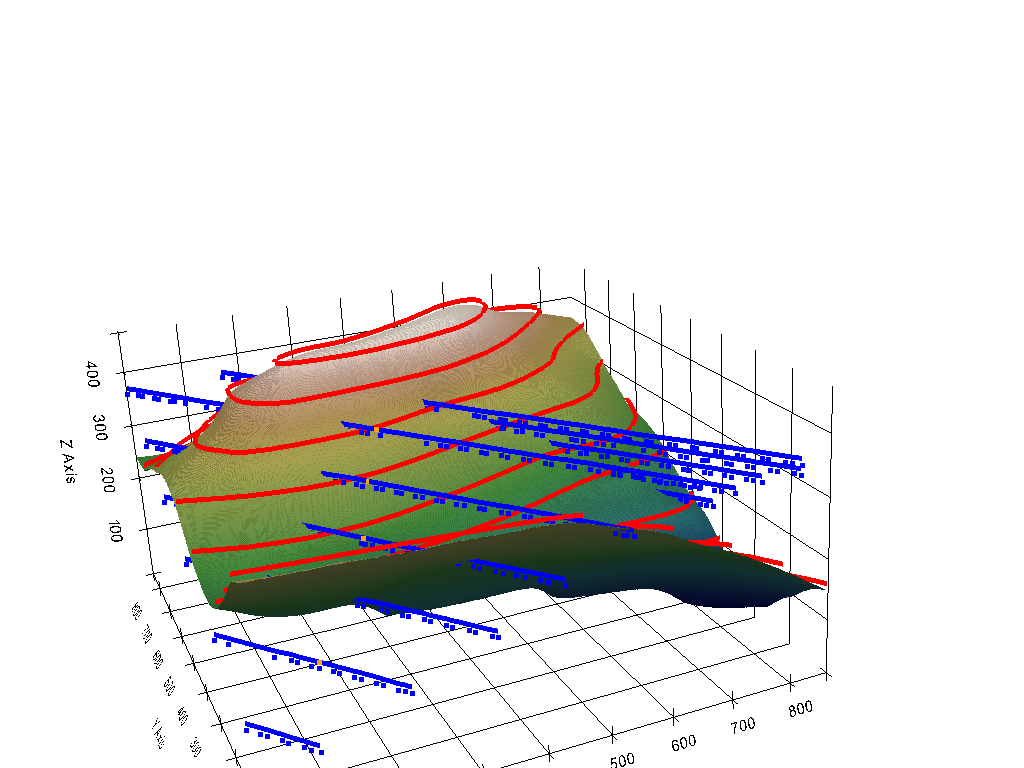

In [26]:
import pyvista as pv
p = pv.Plotter(notebook =True)
gg.visualization.plot_dem_3d(dem, p, cmap = 'gist_earth')
gg.visualization.plot_contours_3d(topo, p, color = 'red', add_to_z = 10)
gg.visualization.plot_points_3d(interfaces_coords, p, color = 'blue', add_to_z = 10)
gg.visualization.plot_points_3d(orientations_coords, p, color = 'orange', add_to_z = 20)
gg.visualization.plot_contours_3d(interfaces_coords, p, color = 'blue', add_to_z = 10)

p.camera_position =[(-283.285811675846, -1597.1397046051004, 1155.542325449192), 
                    (577.9371599370799, 495.3480261506809, 381.7124055285182), 
                    (0.17313457304419916, 0.27814381639313923, 0.9448070898437746)]
p.set_background('white')
p.show_grid(color='black')
p.show()

# Create GemPy Model

## Importing GemPy

Please see https://docs.gempy.org/installation.html for more information on how to install GemPy.

In [27]:
import sys  
sys.path.append('../../../gempy-master')
import gempy as gp
print(gp)
print(gp.__version__)

<module 'gempy' from '../../../gempy-master\\gempy\\__init__.py'>
2.2.2


## Creating GemPy Model

For more information on how to create a GemPy Model, please see the tutorials at: https://docs.gempy.org/tutorials/index.html. With the attributes of the GemPy Data Class, all necessary variables can be passed to the model.

In [28]:
geo_model = gp.create_model(geo_data.model_name)
geo_model

Model2  2020-07-25 19:52

In [29]:
gp.init_data(geo_model, geo_data.extent, geo_data.resolution,
             surface_points_df = geo_data.interfaces,
             orientations_df = geo_data.orientations,
             default_values=True)

Active grids: ['regular']


Model2  2020-07-25 19:52

In [30]:
geo_model.surfaces

surface          series  order_surfaces    color  id
0  Layer1  Default series               1  #015482   1

In [31]:
gp.map_stack_to_surfaces(geo_model,
                         geo_data.stack,
                         remove_unused_series=True)
geo_model.add_surfaces('basement')

surface        series  order_surfaces    color  id
0    Layer1  Strat_Series               1  #015482   1
1  basement  Strat_Series               2  #9f0052   2

In [32]:
geo_model.surfaces.colors.change_colors(geo_data.surface_colors)

surface        series  order_surfaces    color  id
0    Layer1  Strat_Series               1  #b35a2a   1
1  basement  Strat_Series               2  #525252   2

In [33]:
geo_model.set_topography(source='gdal', filepath='../../../gemgis/data/examples/example2/topo.tif')

Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[  8.65      ,   8.66      , -45.5       ],
       [  8.65      ,   8.66      , -36.5       ],
       [  8.65      ,   8.66      , -27.5       ],
       ...,
       [864.49767712, 863.48839907, 360.5065918 ],
       [864.49767712, 864.49303944, 360.58773804],
       [864.49767712, 865.49767981, 360.66662598]])

In [34]:
geo_model.set_section_grid(geo_data.section_dict)

Active grids: ['regular' 'topography' 'sections']


start                                    stop resolution        dist
Section1  [1.593210345965275, 388.4453900184363]  [852.4277356922321, 865.9286460336549]  [100, 80]  975.658572

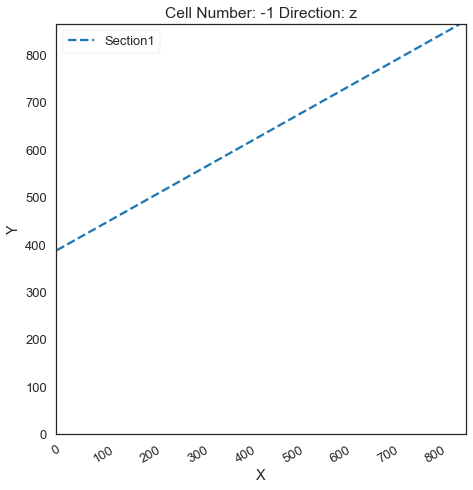

In [35]:
gp.plot.plot_section_traces(geo_model)

In [36]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    update_kriging = False
                    )

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                   values
range             1304.1
$C_o$            40492.4
drift equations      [3]


In [37]:
sol = gp.compute_model(geo_model)

../../../gempy-master\gempy\core\solution.py:315: UserWarning: Surfaces not computed due to: module 'skimage.measure' has no attribute 'marching_cubes'. The surface is: Series: module 'skimage.measure' has no attribute 'marching_cubes'; Surface Number:0
  '; Surface Number:' + str(s_n))


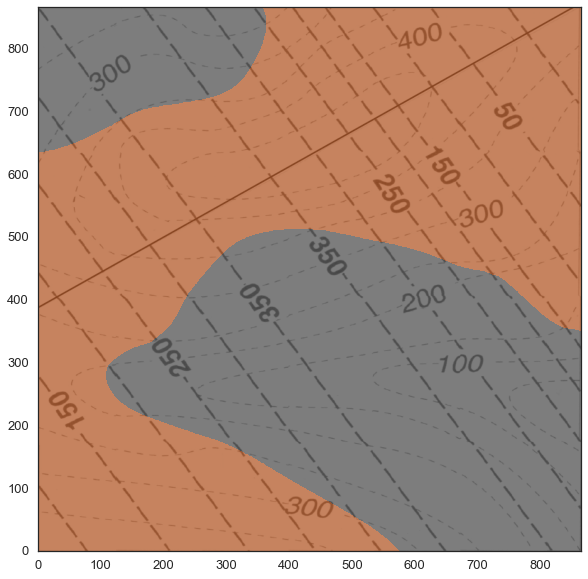

In [38]:
shape = geo_model._grid.topography.values_2d[:, :, 2].shape
geolmap = geo_model.solutions.geological_map[0].reshape(shape)
cols = ['#b35a2a', '#525252']
plt.figure(figsize=(10,10))
plt.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
gmap = np.rot90(geolmap,1)
plt.imshow(gmap, extent=geo_data.extent[:4], alpha=0.75, cmap=ListedColormap(cols))

../../../gempy-master\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


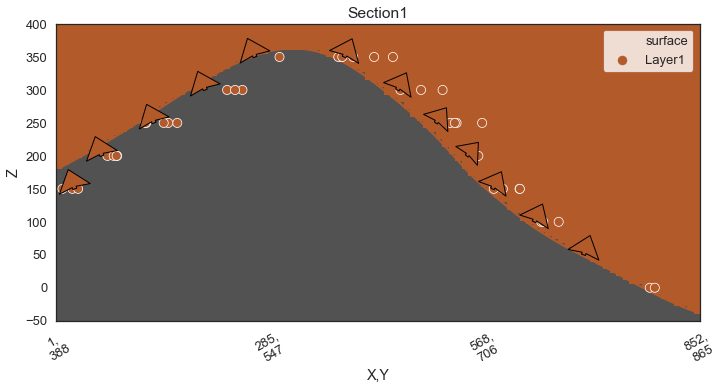

In [39]:
gp.plot_2d(geo_model, section_names=['Section1'])

../../../gempy-master\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


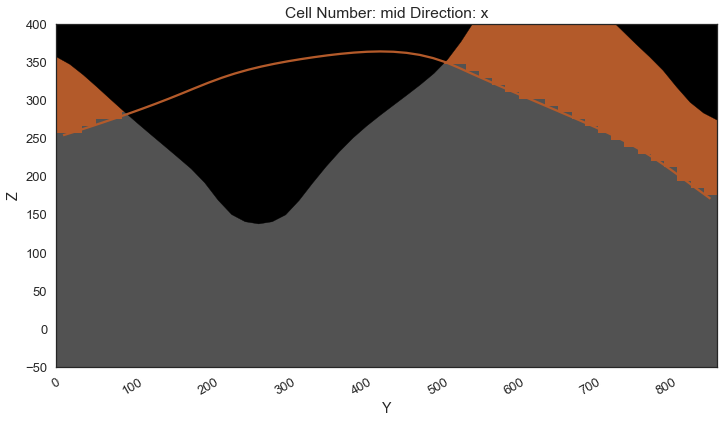

In [40]:
gp.plot_2d(geo_model, direction='x', show_topography=True, show_data=False)

../../../gempy-master\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


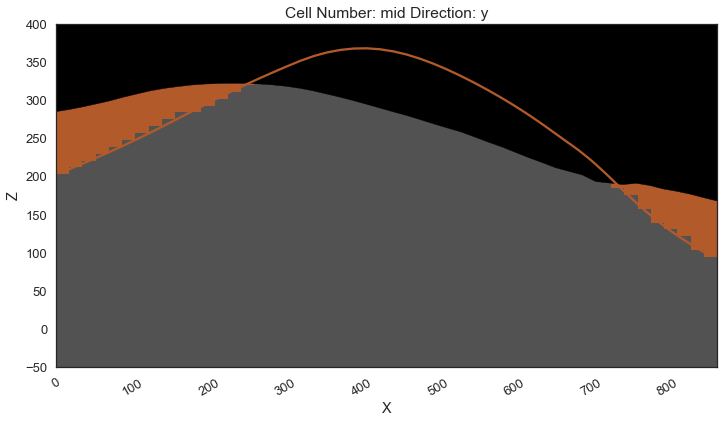

In [41]:
gp.plot_2d(geo_model, direction='y', show_topography=True, show_data=False)

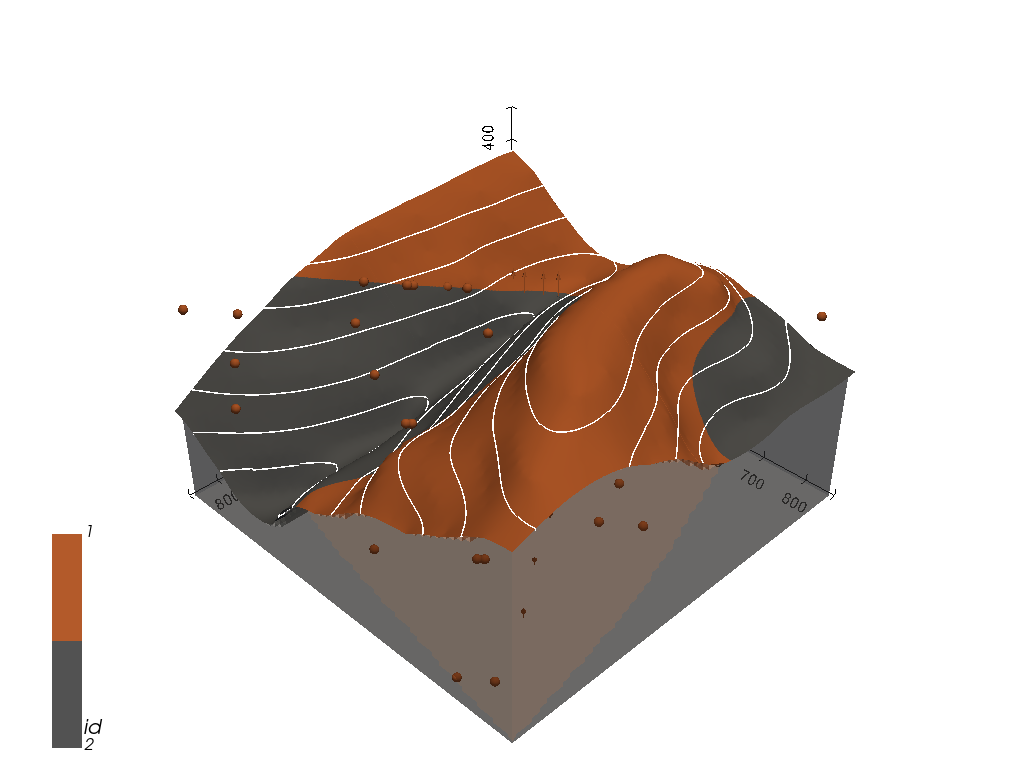

In [42]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=True,
                 plotter_type='basic', notebook=True)

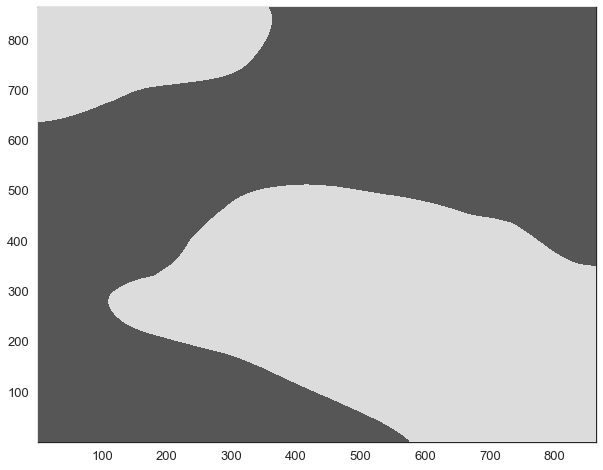

In [47]:
shape = geo_model._grid.topography.values_2d[:, :, 2].shape
scalar_fields = geo_model.solutions.geological_map[1]
c_id = 0  # color id startpoint
zorder = 100
contours = []
fig, ax = plt.subplots(figsize=(10, 8))
for e, block in enumerate(scalar_fields):
    level = geo_model.solutions.scalar_field_at_surface_points[e][np.where(
        geo_model.solutions.scalar_field_at_surface_points[e] != 0)]
    c_id2 = c_id + len(level)  # color id endpoint
    contours = (ax.contourf(block.reshape(shape).T, 0, levels=[block.min()-1] + sorted(level) + [block.max()+1],
#                colors=geo_model.colors[c_id:c_id2][::-1],
               linestyles='solid', origin='lower',
               extent=[0,865,0,866],zorder=zorder - (e + len(level)))
               )
    c_id = c_id2

In [48]:
from shapely import geometry

fm = []
geo = []
for col, fm_name in zip(contours.collections, geo_model.surfaces.df.sort_values(by="order_surfaces", ascending=False).surface):
    # Loop through all polygons that have the same intensity level
    for contour_path in col.get_paths(): 
        # Create the polygon for this intensity level
        # The first polygon in the path is the main one, the following ones are "holes"
        for ncp,cp in enumerate(contour_path.to_polygons()):
            x = cp[:,0]
            y = cp[:,1]
            new_shape = geometry.Polygon([(i[0], i[1]) for i in zip(x,y)])
            if ncp == 0:
                poly = new_shape
            else:
                # Remove the holes if there are any
                poly = poly.difference(new_shape)
                # Can also be left out if you want to include all rings
        # do something with polygon
        fm.append(fm_name)
        geo.append(poly)

In [49]:
lith = gpd.GeoDataFrame(
    {"formation":fm},
    geometry=geo,
)
lith.crs = extent.crs
lith.to_file("lith.shp")

In [50]:
lith

formation                                           geometry
0  basement  POLYGON ((574.155 1.383, 574.909 0.502, 575.16...
1  basement  POLYGON ((1.507 635.735, 2.512 635.726, 3.516 ...
2    Layer1  POLYGON ((1.507 0.502, 2.512 0.502, 3.516 0.50...